# **Techniques to Handle Imbalanced Datasets :**

- Upsampling

- Downsampling

- Using the Right Performance Metric (ROC, AUC Curve)

### **1. Import the Libraries :**


In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

# sklearn.utils.resample is used to sample points from a population/dataset

from sklearn.utils import resample

### **2. Download the Kaggle Credit Card Fraud data set:**

In [52]:
file = tf.keras.utils
creditcard_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

### **3. Explore the Dataset :**

In [53]:
# Our Credit Card Dataset :

creditcard_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
# Let's see the Class/Label Distribution in our dataset:

values = creditcard_df['Class'].value_counts()
class_labels = creditcard_df['Class'].unique()

for keys,val in zip(class_labels,values):
  print('For Class = ',keys,', No. of Datapoints = ',val)

For Class =  0 , No. of Datapoints =  284315
For Class =  1 , No. of Datapoints =  492


In [55]:
values

0    284315
1       492
Name: Class, dtype: int64

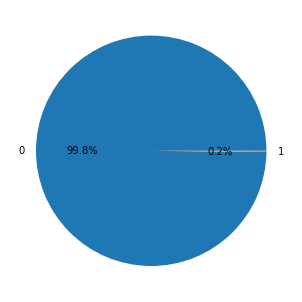

In [56]:
# Visualize the Class Imbalance : https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.pie(x = values, labels = class_labels, autopct='%1.1f%%')
plt.show()

### **4. Split the Data based on Class Labels :**

In [57]:
# Split the Data : Minority_df and Majority_df

Minority_df = creditcard_df[creditcard_df['Class'] == 1]

Majority_df = creditcard_df[creditcard_df['Class'] == 0]

In [58]:
print('Number of Minority Class Datapoints : ',len(Minority_df))
print('\nNumber of Majority Class Datapoints : ',len(Majority_df))


Number of Minority Class Datapoints :  492

Number of Majority Class Datapoints :  284315


### **5. Upsampling and Downsampling :**

### **#1. Downsampling :**

-- Resample the majority class without replacement.

-- Setting the number of samples to match that of the minority class *(No. of Samples = No. of Minority Class Points)*

In [59]:
# Sample less of Majority Class points : 

downsampled_majority_df = resample(Majority_df, 
                                 replace= False,    # sample without replacement
                                 n_samples= len(Minority_df),     # to match minority class
                                 random_state=123) # reproducible results

In [60]:
# Merge the Minority Data and Down-sampled Majority Data :

Downsampled_df = pd.concat([downsampled_majority_df, Minority_df])

For Class =  0 , No. of Datapoints =  492
For Class =  1 , No. of Datapoints =  492


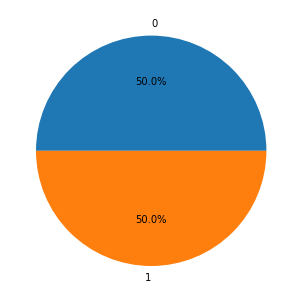

In [61]:
# Let's see the Class/Label Distribution in our dataset:

values = Downsampled_df['Class'].value_counts()
class_labels = Downsampled_df['Class'].unique()

for keys,val in zip(class_labels,values):
  print('For Class = ',keys,', No. of Datapoints = ',val)

# Visualize the Class Imbalance : 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.pie(x = values, labels = class_labels, autopct='%1.1f%%')
plt.show()

### **#1. Upsampling :**

-- Resample the majority class with replacement.

-- Setting the number of samples to match that of the Majority class *(No. of Samples = No. of Majority Class Points)*

In [62]:
# Sample less of Majority Class points : 

upsampled_minority_df = resample(Minority_df, 
                                 replace= True,    # sample with replacement
                                 n_samples= len(Majority_df),     # to match majoority class
                                 random_state=123) # reproducible result

In [63]:
# Merge the Minority Data and Down-sampled Majority Data :

upsampled_df = pd.concat([upsampled_minority_df, Majority_df])

For Class =  1 , No. of Datapoints =  284315
For Class =  0 , No. of Datapoints =  284315


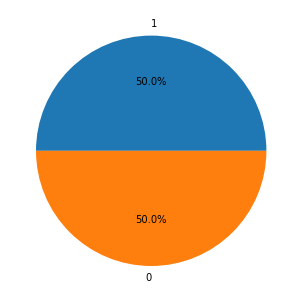

In [64]:
# Let's see the Class/Label Distribution in our dataset:

values = upsampled_df['Class'].value_counts()
class_labels = upsampled_df['Class'].unique()

for keys,val in zip(class_labels,values):
  print('For Class = ',keys,', No. of Datapoints = ',val)

# Visualize the Class Imbalance : 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.pie(x = values, labels = class_labels, autopct='%1.1f%%')
plt.show()